# DALES plot x-z planes
Mostly plotting deviations from the x-direction mean & 10-hour averages. 
TODO: replace x-averages with plane averages fom `profiles.001_05X.run_X.nc`

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cmo
from matplotlib.colors import LogNorm

## Load data

In [6]:
# Load data
output_directory = '/scratch/jk72/mxr581/dales/run2'
filename = 'crossxz.0256.010_019.run_2.nc'
file_path = f"{output_directory}/{filename}"
ds_run2 = xr.open_dataset(file_path, chunks = {})

# Load data
output_directory = '/scratch/fy29/mxr581/dales/run1'
filename = 'crossxz.0256.010_019.run_1.nc'
file_path = f"{output_directory}/{filename}"
ds_run1 = xr.open_dataset(file_path, chunks = {})

# Load data
output_directory = '/scratch/fy29/mxr581/dales/run3'
filename = 'crossxz.0256.010_019.run_3.nc'
file_path = f"{output_directory}/{filename}"
ds_run3 = xr.open_dataset(file_path, chunks = {})

In [7]:
#ds_run1

## 1. Virtual potential temperature $\theta_v$ (K)

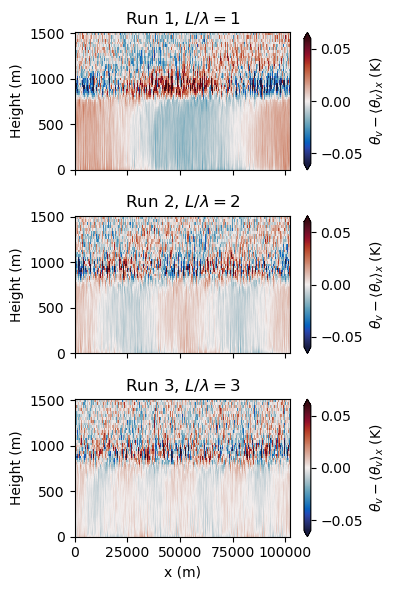

<Figure size 640x480 with 0 Axes>

In [8]:
# virtual potential temperature plane [thvxy = f(zt, xt)]

# Set up a figure: 3 subplots 
fig, axes = plt.subplots(3, 1, figsize=(4, 6), sharex=True)

# Restrict zt to < 1500 m
z_max = 1500

var_run1 = ds_run1.thvxz.mean('time').compute() - ds_run1.thvxz.mean('time').mean('xt').compute()
var_run2 = ds_run2.thvxz.mean('time').compute() - ds_run2.thvxz.mean('time').mean('xt').compute()
var_run3 = ds_run3.thvxz.mean('time').compute() - ds_run3.thvxz.mean('time').mean('xt').compute()

# common color limits 
vmin = var_run1.sel(zt=slice(0, z_max)).min()*0.5
vmax = -vmin 

cbar_kwargs = {'label': r'$\theta_v-\langle \theta_v \rangle_{x}$ (K)'}

# --- Run 1 ---
var_run1.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[0], cmap='cmo.balance',
     vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[0].set(title = 'Run 1, $L/\lambda = 1$', xlabel = '', ylabel = 'Height (m)')

# --- Run 2 ---
var_run2.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[1], cmap='cmo.balance',
    vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[1].set(title = 'Run 2, $L/\lambda = 2$', xlabel = '', ylabel = 'Height (m)')

#--- Run 3 (optional) ---
var_run3.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[2], cmap='cmo.balance',
     vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[2].set(title = 'Run 3, $L/\lambda = 3$', xlabel = 'x (m)', ylabel = 'Height (m)')

plt.tight_layout()
plt.show()
plt.savefig('./notebooks/variable-sst-DALES-analysis/figures/thv-anomaly-xz-planes-hours-10-19.png')

## 2. Total water specific humidity $q_t$ (kg/kg)

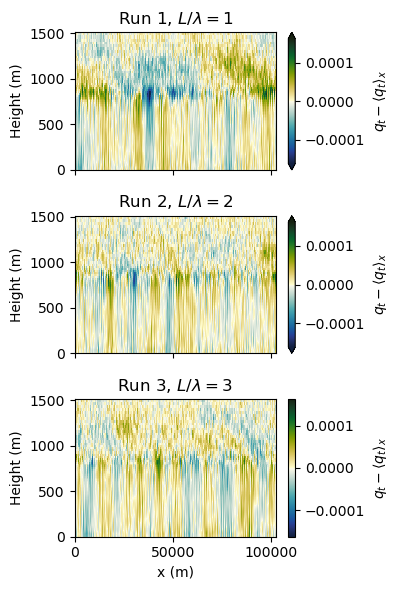

<Figure size 640x480 with 0 Axes>

In [9]:
# total water specific humidity planes [qtxy = f(zt, xt)]

# Set up a figure: 3 subplots 
fig, axes = plt.subplots(3, 1, figsize=(4, 6), sharex=True)

# Restrict zt to < 1500 m
z_max = 1500

var_run1 = ds_run1.qtxz.mean('time').compute() - ds_run1.qtxz.mean('time').mean('xt').compute()
var_run2 = ds_run2.qtxz.mean('time').compute() - ds_run2.qtxz.mean('time').mean('xt').compute()
var_run3 = ds_run3.qtxz.mean('time').compute() - ds_run3.qtxz.mean('time').mean('xt').compute()

# common color limits 
vmin = var_run1.sel(zt=slice(0, z_max)).min()*0.8
vmax = -vmin 

cbar_kwargs = {'label': r'$q_t-\langle q_t \rangle_{x}$'}

# --- Run 1 ---
var_run1.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[0], cmap='cmo.delta',
     vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[0].set(title = 'Run 1, $L/\lambda = 1$', xlabel = '', ylabel = 'Height (m)')

# --- Run 2 ---
var_run2.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[1], cmap='cmo.delta',
    vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[1].set(title = 'Run 2, $L/\lambda = 2$', xlabel = '', ylabel = 'Height (m)')

#--- Run 3 (optional) ---
var_run3.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[2], cmap='cmo.delta',
     vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[2].set(title = 'Run 3, $L/\lambda = 3$', xlabel = 'x (m)', ylabel = 'Height (m)')

plt.tight_layout()
plt.show()
plt.savefig('./notebooks/variable-sst-DALES-analysis/figures/qt-anomaly-xz-planes-hours-10-19.png')

## 3. east-west velocity  $u$ (m/s)

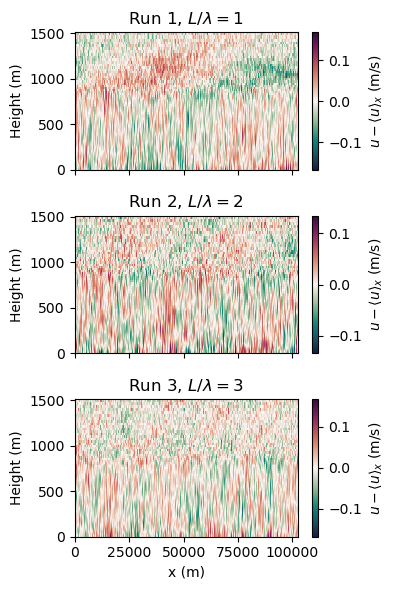

<Figure size 640x480 with 0 Axes>

In [10]:
### -----------------------------
# east-west velocity plane [uxy = f(zt, xm)]
### -----------------------------

# Set up a figure: 3 subplots 
fig, axes = plt.subplots(3, 1, figsize=(4, 6), sharex=True)

# Restrict zt to < 1500 m
z_max = 1500

var_run1 = ds_run1.uxz.mean('time').compute() - ds_run1.uxz.mean('time').mean('xm').compute()
var_run2 = ds_run2.uxz.mean('time').compute() - ds_run2.uxz.mean('time').mean('xm').compute()
var_run3 = ds_run3.uxz.mean('time').compute() - ds_run3.uxz.mean('time').mean('xm').compute()

# common color limits 
vmin = var_run1.sel(zt=slice(0, z_max)).min()*0.3
vmax = -vmin 

cbar_kwargs = {'label': r'$u-\langle u \rangle_{x}$ (m/s)'}

# --- Run 1 ---
var_run1.sel(zt=slice(0, z_max)).plot(
    x='xm', y='zt', ax=axes[0], cmap='cmo.curl',
     #vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[0].set(title = 'Run 1, $L/\lambda = 1$', xlabel = '', ylabel = 'Height (m)')

# --- Run 2 ---
var_run2.sel(zt=slice(0, z_max)).plot(
    x='xm', y='zt', ax=axes[1], cmap='cmo.curl',
    # vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[1].set(title = 'Run 2, $L/\lambda = 2$', xlabel = '', ylabel = 'Height (m)')

#--- Run 3 (optional) ---
var_run3.sel(zt=slice(0, z_max)).plot(
    x='xm', y='zt', ax=axes[2], cmap='cmo.curl',
     #vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[2].set(title = 'Run 3, $L/\lambda = 3$', xlabel = 'x (m)', ylabel = 'Height (m)')

plt.tight_layout()
plt.show()
plt.savefig('./notebooks/variable-sst-DALES-analysis/figures/u-anomaly-xz-planes-hours-10-19.png')

## 4. north-south velocity $v$ (m/s)

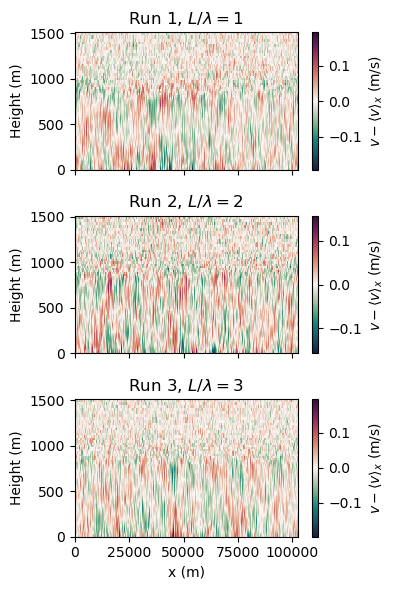

<Figure size 640x480 with 0 Axes>

In [11]:
# north-south velocity plane [vxy = f(zt, xt)]

# Set up a figure: 3 subplots 
fig, axes = plt.subplots(3, 1, figsize=(4, 6), sharex=True)

# Restrict zt to < 1500 m
z_max = 1500

var_run1 = ds_run1.vxz.mean('time').compute() - ds_run1.vxz.mean('time').mean('xt').compute()
var_run2 = ds_run2.vxz.mean('time').compute() - ds_run2.vxz.mean('time').mean('xt').compute()
var_run3 = ds_run3.vxz.mean('time').compute() - ds_run3.vxz.mean('time').mean('xt').compute()

# common color limits 
vmin = var_run1.sel(zt=slice(0, z_max)).min()*0.3
vmax = -vmin 

cbar_kwargs = {'label': r'$v-\langle v \rangle_{x}$ (m/s)'}

# --- Run 1 ---
var_run1.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[0], cmap='cmo.curl',
     #vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[0].set(title = 'Run 1, $L/\lambda = 1$', xlabel = '', ylabel = 'Height (m)')

# --- Run 2 ---
var_run2.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[1], cmap='cmo.curl',
    # vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[1].set(title = 'Run 2, $L/\lambda = 2$', xlabel = '', ylabel = 'Height (m)')

#--- Run 3 (optional) ---
var_run3.sel(zt=slice(0, z_max)).plot(
    x='xt', y='zt', ax=axes[2], cmap='cmo.curl',
     #vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[2].set(title = 'Run 3, $L/\lambda = 3$', xlabel = 'x (m)', ylabel = 'Height (m)')

plt.tight_layout()
plt.show()
plt.savefig('./notebooks/variable-sst-DALES-analysis/figures/v-anomaly-xz-planes-hours-10-19.png')

## vertical velocity $w$ (m/s)

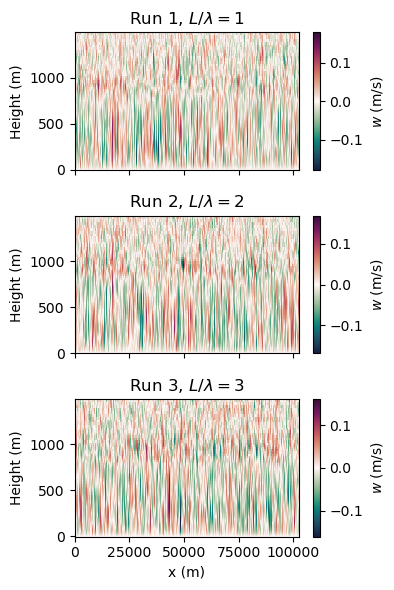

<Figure size 640x480 with 0 Axes>

In [12]:
### -----------------------------
# vertical velocity plane [wxy = f(zm, xt)]
### -----------------------------

# Set up a figure: 3 subplots 
fig, axes = plt.subplots(3, 1, figsize=(4, 6), sharex=True)

# Restrict zt to < 1500 m
z_max = 1500

var_run1 = ds_run1.wxz.mean('time').compute() 
var_run2 = ds_run2.wxz.mean('time').compute() 
var_run3 = ds_run3.wxz.mean('time').compute() 

# common color limits 
vmin = var_run1.sel(zm=slice(0, z_max)).min()*0.3
vmax = -vmin 

cbar_kwargs = {'label': r'$w$ (m/s)'}

# --- Run 1 ---
var_run1.sel(zm=slice(0, z_max)).plot(
    x='xt', y='zm', ax=axes[0], cmap='cmo.curl',
     #vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[0].set(title = 'Run 1, $L/\lambda = 1$', xlabel = '', ylabel = 'Height (m)')

# --- Run 2 ---
var_run2.sel(zm=slice(0, z_max)).plot(
    x='xt', y='zm', ax=axes[1], cmap='cmo.curl',
    # vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[1].set(title = 'Run 2, $L/\lambda = 2$', xlabel = '', ylabel = 'Height (m)')

#--- Run 3 (optional) ---
var_run3.sel(zm=slice(0, z_max)).plot(
    x='xt', y='zm', ax=axes[2], cmap='cmo.curl',
     #vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[2].set(title = 'Run 3, $L/\lambda = 3$', xlabel = 'x (m)', ylabel = 'Height (m)')

plt.tight_layout()
plt.show()
plt.savefig('./notebooks/variable-sst-DALES-analysis/figures/w-anomaly-xz-planes-hours-10-19.png')